In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import celerite as ce
import emcee as mc
import QPP_Funcs as qpp
import corner
from celerite.modeling import Model
from scipy.optimize import minimize, curve_fit

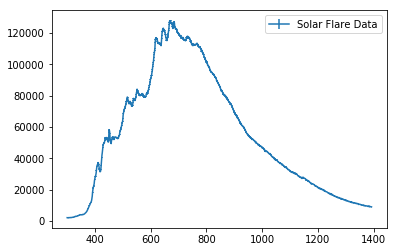

In [2]:
#opening data
data1 = "/Users/chris/Documents/QPP/SolarFlareGPs/data/120704187_ctime_lc.txt"
t, I = np.loadtxt(data1, unpack=True)
Ierr = np.sqrt(I)

plt.errorbar(t, I, yerr=Ierr, label = "Solar Flare Data")
plt.legend()
plt.show()

In [3]:
A_guess, t1_guess, t2_guess = qpp.initguess(t,I)
model = qpp.CTSModel_prior(log_A = np.log(A_guess), log_tau1 = np.log(t1_guess), log_tau2 = np.log(t2_guess))
kernel1 = qpp.SHOTerm_Prior(log_S0 = 20, log_Q = -1, log_omega0 = -1) #write guesser for kernel parameters
kernel2 = qpp.RealTerm_Prior(log_a=0., log_c=0.) #write guesser for kernel parameters
kernel = kernel1 + kernel2
gp = ce.GP(kernel, mean=model, fit_mean=True)
gp.compute(t, Ierr)

In [4]:
soln = qpp.optimize_gp(gp, I)

Initial log-likelihood: -10120.8047984
Final log-likelihood: -8263.61770044
Optimized log-parameters: [ 28.75124206  -3.02908091  -4.38817204  -0.12169977  -0.09619094
  11.7596328    6.67781358   6.85106281]


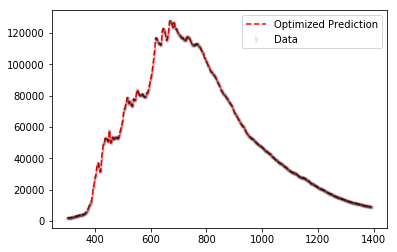

In [5]:
fig = qpp.plot_gp(t, I, Ierr, gp, model, soln=soln)
plt.show()

In [6]:
sampler = qpp.sample_gp(soln.x, I, gp, burnin=1500, nsteps = 2000)

Burning in...


QPP_Funcs.py:75: RuntimeWarning: divide by zero encountered in log
  return np.log(prob_a*prob_c * np.e)
QPP_Funcs.py:42: RuntimeWarning: divide by zero encountered in log
  return np.log(probA * probtau1 * probtau2 * np.e)
QPP_Funcs.py:17: RuntimeWarning: overflow encountered in exp
  lam = np.exp(np.sqrt(2*np.exp(self.log_tau1-self.log_tau2)))
QPP_Funcs.py:18: RuntimeWarning: invalid value encountered in multiply
  return np.exp(self.log_A)*lam*np.exp((-np.exp(self.log_tau1)/t)-(t/np.exp(self.log_tau2)))
QPP_Funcs.py:18: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(self.log_A)*lam*np.exp((-np.exp(self.log_tau1)/t)-(t/np.exp(self.log_tau2)))
QPP_Funcs.py:60: RuntimeWarning: divide by zero encountered in log
  return np.log(prob_S0*prob_Q*prob_omega0 * np.e)


Sampling...
Done!


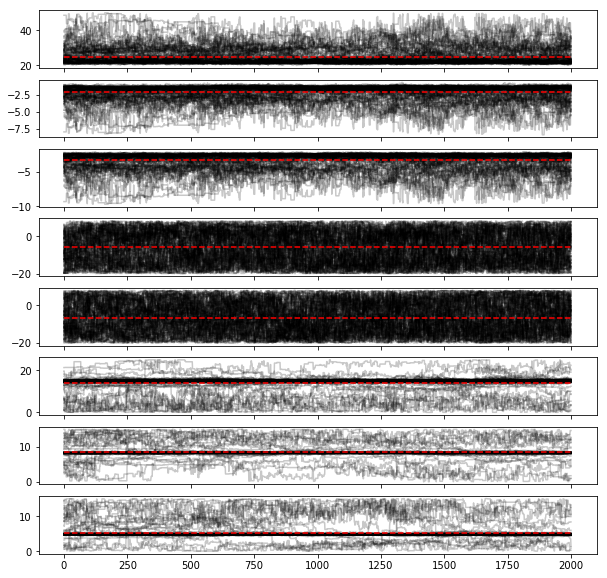

In [7]:
chain = sampler.chain
fig = qpp.plot_chain(chain)
plt.show()

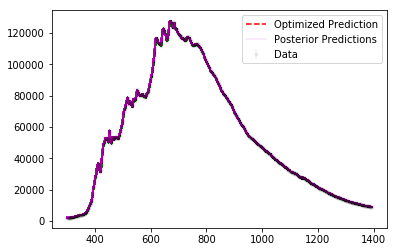

In [8]:
fig = qpp.plot_gp(t, I, Ierr, gp, model, soln=soln, chain=chain)
plt.show()

[ 21.33788717  -1.35737413  -2.51551331   0.43981082 -18.59956604
  14.7310797    8.24912856   4.65905761]


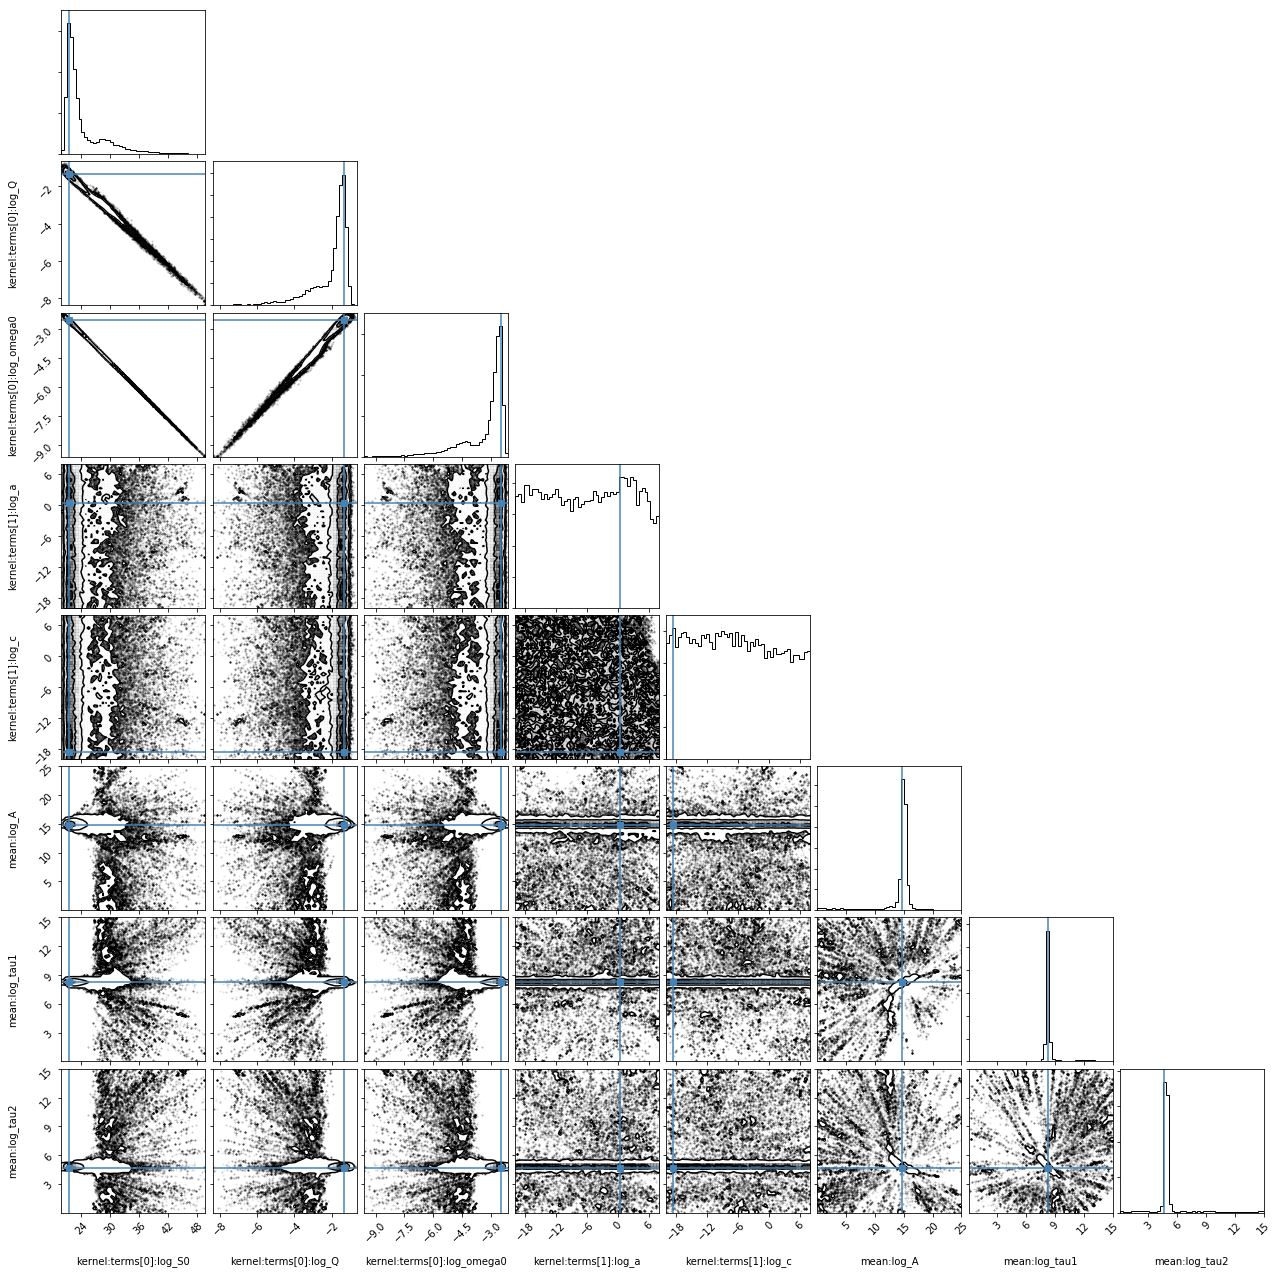

In [9]:
fig, maxparams = qpp.plot_corner(chain, labels = gp.get_parameter_names())
print maxparams
plt.show()